### Example Multiple Linear Regression 4.14

Let us consider the following model
\begin{equation*}
sales
=\beta_{0}+\beta_{1}\cdot radio +\beta_{2}\cdot newspaper +\epsilon
\end{equation*} 
and the model that includes as well the interaction term $TV\cdot radio$
\begin{equation*}
sales
=\beta_{0}+\beta_{1}\cdot TV +\beta_{2}\cdot radio +\beta_{3}\cdot TV \cdot radio +\epsilon
\end{equation*}

We have omitted the predictor **newspaper**, since we came to the conclusion that **newspaper** is not relevant to predict  **sales**.

The figure displays the Tukey-Anscombe plots for these two models. The right-hand panel displays the Tukey-Anscombe plot for the model where the interaction term $TV \cdot radio$ is included, in the left-hand panel the Tukey-Anscombe plot for the model without interaction term is shown. We observe that there is a clear improvement of the smoothing curve, when the interaction term is included in the model. 

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Load data
df = pd.read_csv('./data/Advertising.csv')

# Define the linear models:
x_plain = pd.DataFrame({
    'TV' : df['TV'],
    'radio' : df['radio']})
x_inter = pd.DataFrame({
    'TV' : df['TV'],
    'radio' : df['radio'],
    'TV*radio' : df['TV'] * df['radio']})
y = df['sales']

# Fit models
# Plain model
x_plain_sm = sm.add_constant(x_plain)
model_plain = sm.OLS(y, x_plain_sm).fit()

# Model including interaction term
x_inter_sm = sm.add_constant(x_inter)
model_inter = sm.OLS(y, x_inter_sm).fit()

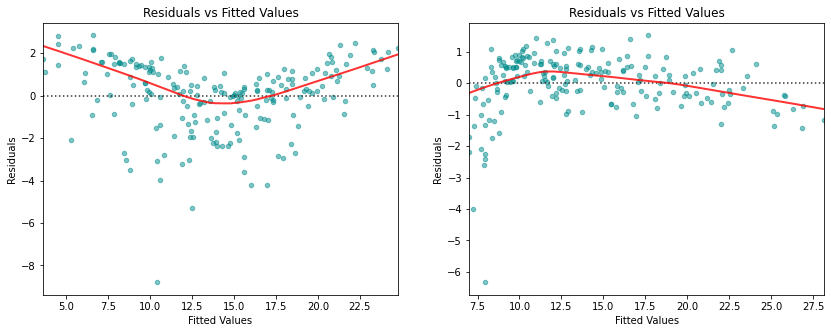

In [2]:
# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Residuals vs fitted data
ax1 = fig.add_subplot(1, 2, 1)
# Scatter data
ax1 = sns.residplot(
    x=model_plain.fittedvalues, y=model_plain.resid,  
    data=df, lowess=True, 
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels 
ax1.set_title('Residuals vs Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Fitted Values')

# Plot left figure: Residuals vs fitted data
ax1 = fig.add_subplot(1, 2, 2)
# Scatter data
ax2 = sns.residplot(
    x=model_inter.fittedvalues, y=model_inter.resid,  
    data=df, lowess=True, 
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels 
ax2.set_title('Residuals vs Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('Fitted Values')

# Show plot
plt.show()

In the right-hand panel the scale-location plot for the model considering the interaction term $TV \cdot radio$ is displayed, the left-hand panel displays the scale-location plot for the model without interaction term.  We observe again an improvement of the smoothing curve in the sense that including the interaction term leads to a rather constant smoother. 

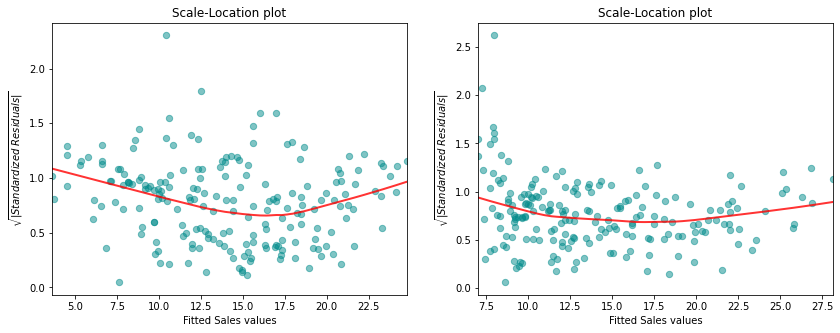

In [4]:
import numpy as np

# Residuals of the model
res_plain = model_plain.resid
res_inter = model_inter.resid
# Influence of the Residuals
res_inf_plain = model_plain.get_influence()
res_inf_inter = model_inter.get_influence()
# Studentized residuals using variance from OLS
res_standard_plain = res_inf_plain.resid_studentized_internal
res_standard_inter = res_inf_inter.resid_studentized_internal
# Absolute square root Residuals:
res_stand_sqrt_plain = np.sqrt(np.abs(res_standard_plain))
res_stand_sqrt_inter = np.sqrt(np.abs(res_standard_inter))

# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Residuals vs fitted data
ax1 = fig.add_subplot(1, 2, 1)
# plot Regression usung Seaborn
sns.regplot(x=model_plain.fittedvalues, y=res_stand_sqrt_plain, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
ax1.set_title('Scale-Location plot')
ax1.set_xlabel('Fitted Sales values')
ax1.set_ylabel('$\sqrt{\|Standardized\ Residuals\|}$')

# Plot left figure: Residuals vs fitted data
ax2 = fig.add_subplot(1, 2, 2)
# plot Regression usung Seaborn
sns.regplot(x=model_inter.fittedvalues, y=res_stand_sqrt_inter, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
ax2.set_title('Scale-Location plot')
ax2.set_xlabel('Fitted Sales values')
ax2.set_ylabel('$\sqrt{\|Standardized\ Residuals\|}$')

# Show plot
plt.show()

On the basis of the residual plots, we therefore conclude that the model including the interaction term fits the data better. There is however an aspect of the residual analysis for the model including the interaction term that seems problematic: the outlying observations 131 und 156. 

The next figure plots for every observation the leverage statistic $h_i$ versus the standardized residual $\tilde{r}_i$. In multiple regression, the values of the levarage statistic $h_i$ are defined as diagonal elements $H_{ii}$ of the $n\times n$ *hat matrix* $H$. The hat matrix is defined as
\begin{equation*}
H=X(X^{T}X)^{-1}X^{T}
\end{equation*}

where $X$ denotes the $n\times (p+1)$ data matrix composed of $n$ measurements, of $p$ features, and of ones in the first column. The expected value of the leverage statistic is given by 
\begin{equation*}
(p + 1) / n
\end{equation*}

where $p$ denotes the number of predictor variables and $ n $ is the number of data points. So if a given observation has a leverage statistic that greatly exceeds the expected value, that is
\begin{equation*}
h_i>>\frac{(p+1)}{n}
\end{equation*}
then we may suspect that the corresponding point has *high leverage*. In the previous example of the **Advertising** data for the model including the interaction term, we have $ p=3 $ and $ n=200 $. Thus, a value of the leverage statistic exceeding $ 4/200=0.02 $ should attract our attention.

In order to have a *dangerous* influence on the regression model, an observation needs to have as well a large absolute value of the residual. In simple linear regression analysis, Cook's distance is a function of the leverage statistic $ h_{i} $ and of the standardized residual $ \tilde{r}_i $. In multiple regression, Cook's distance is defined as
\begin{equation*}
d_i=\frac{H_{ii}}{1-H_{ii}}\frac{\tilde{r}_i^2}{p+1}
\end{equation*}

where $H_{ii}$ denotes the diagonal elements of the hat matrix $H$. 

The next figure displays the contour lines for the function values $ 1 $, $ 0.5 $, and $0.1$ of Cook's distance. Observations with a Cook's distance larger than $ 1 $ must be considered as dangerous.

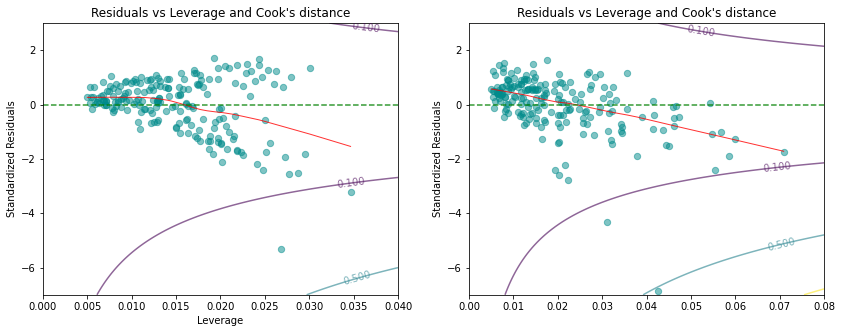

In [5]:
# Cook's Distance and leverage:
res_inf_cooks_plain = res_inf_plain.cooks_distance
res_inf_cooks_inter = res_inf_inter.cooks_distance
res_inf_leverage_plain = res_inf_plain.hat_matrix_diag
res_inf_leverage_inter = res_inf_inter.hat_matrix_diag

# Contour levels for Cook's distance 
n = 100   # Grid dimensions
n_pred_plain = x_plain.shape[1]
n_pred_inter = x_inter.shape[1]
xmin, ymin, ymax = 0, -7, 3  # Grid boundaries
xmax_plain, xmax_inter = 0.04, 0.08
cooks_distance_plain = np.zeros((n, n))
cooks_distance_inter = np.zeros((n, n))
# Create grid
y_cooks = np.linspace(ymin, ymax, n)
x_cooks_plain = np.linspace(xmin, xmax_plain, n)
x_cooks_inter = np.linspace(xmin, xmax_inter, n)

for xi in range(n):
    for yi in range(n):
        cooks_distance_plain[yi][xi] = (
            y_cooks[yi]**2 * x_cooks_plain[xi] /
            (1 - x_cooks_plain[xi]) / (n_pred_plain + 1))
        cooks_distance_inter[yi][xi] = (
            y_cooks[yi]**2 * x_cooks_inter[xi] / 
            (1 - x_cooks_inter[xi]) / (n_pred_inter + 1))
# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Cook's distance
ax1 = fig.add_subplot(1, 2, 1)
# ax1.set_xlim(0, 0.04)
# Plot standardized Residuals
sns.regplot(x=res_inf_leverage_plain, y=res_standard_plain, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# Plot centre line
plt.plot((xmin, xmax_plain), (0, 0), 'g--', alpha=0.8)
# Plot Cook's Distance
CS = ax1.contour(x_cooks_plain, y_cooks, cooks_distance_plain, 
                 levels=[0.1, 0.5, 1], alpha=0.6)
# labels and title
ax1.clabel(CS, inline=0,  fontsize=10)
ax1.set_title('Residuals vs Leverage and Cook\'s distance')
ax1.set_xlabel('Leverage')
ax1.set_ylabel('Standardized Residuals')

# Plot left figure: Cook's distance
ax2 = fig.add_subplot(1, 2, 2)
# Plot Regression using Seaborn
sns.regplot(x=res_inf_leverage_inter, y=res_standard_inter, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# Plot centre line
plt.plot((xmin, xmax_inter), (0, 0), 'g--', alpha=0.8)
# Plot Cook's Distance
CS = ax2.contour(x_cooks_inter, y_cooks, cooks_distance_inter, 
                 levels=[0.1, 0.5, 1], alpha=0.6)
# labels and title
ax2.clabel(CS, inline=0,  fontsize=10)
ax2.set_title('Residuals vs Leverage and Cook\'s distance')
# ax2.set_xlabel('Leverage')
ax2.set_ylabel('Standardized Residuals')

# Show plot
plt.show()

Based on the plots we conclude that observations 156 and 131 are *not* dangerous.